## Chapter 8

### Class Activation Maps (CAM) & Variations

##### We will look at the explanations provided through these methods

This notebook focusses on Smooth Class Activation Maps. We use the pretrained resnet18 model from torchvision.

There is a file imagenet_class_index.json which has the labels for the model <br>

Original source for this notebook is from the Torchcam library - https://github.com/frgfm/torch-cam

**Install required libraries**

In [ ]:

!pip install torchvision matplotlib
!pip install torchcam

**Load the pretrained Resnet18 models and instantiate the CAM extractor on the model**

In [2]:
# Define your model
from torchvision.models import resnet18
model = resnet18(pretrained=True).eval()

# Set your CAM extractor
from torchcam.methods import SmoothGradCAMpp
cam_extractor = SmoothGradCAMpp(model)

c:\Users\achakkirala\AppData\Local\miniconda3\envs\env-02\lib\site-packages\torchvision\models\_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
c:\Users\achakkirala\AppData\Local\miniconda3\envs\env-02\lib\site-packages\torchvision\models\_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet18_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet18_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
Downloading: "https://download.pytorch.org/models/resnet18-f37072fd.pth" to C:\Users\achakkirala/.cache\torch\hub\checkpoints\resnet18-f37072fd.pth
100%|██████████| 44.7M/44.7M [00:01<00:00, 29.9MB/s]


**Normalize image and use the Smooth extractor to retrieve the image activate map for the predicted class**

In [3]:
from torchvision.io.image import read_image
from torchvision.transforms.functional import normalize, resize, to_pil_image
from torchvision.models import resnet18
from torchcam.methods import SmoothGradCAMpp

model = resnet18(pretrained=True).eval()
# Get your input
img = read_image("testleaf.jpeg")
# Preprocess it for your chosen model
input_tensor = normalize(resize(img, (224, 224)) / 255., [0.485, 0.456, 0.406], [0.229, 0.224, 0.225])

with SmoothGradCAMpp(model) as cam_extractor:
  # Preprocess your data and feed it to the model
  out = model(input_tensor.unsqueeze(0))
  # Retrieve the CAM by passing the class index and the model output
  activation_map = cam_extractor(out.squeeze(0).argmax().item(), out)

c:\Users\achakkirala\AppData\Local\miniconda3\envs\env-02\lib\site-packages\torchvision\models\_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
c:\Users\achakkirala\AppData\Local\miniconda3\envs\env-02\lib\site-packages\torchvision\models\_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet18_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet18_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


**Display the activation map of the class prediction from Smooth CAM**

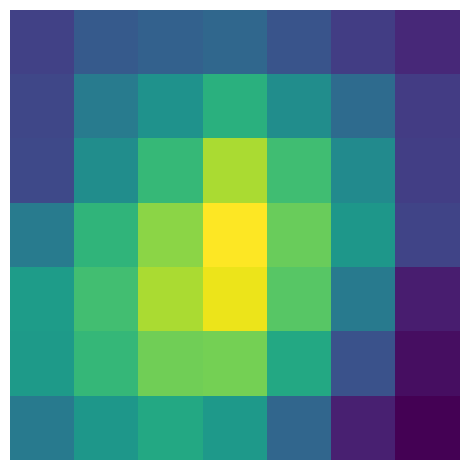

In [4]:
import matplotlib.pyplot as plt
# Visualize the raw CAM
plt.imshow(activation_map[0].squeeze(0).numpy()); plt.axis('off'); plt.tight_layout(); plt.show()

**Overlay the activation map on the original image**

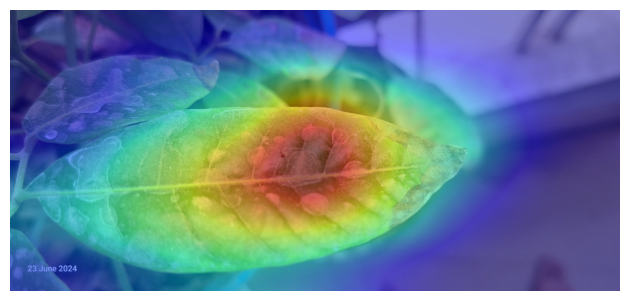

: 

In [5]:
import matplotlib.pyplot as plt
from torchcam.utils import overlay_mask

# Resize the CAM and overlay it
result = overlay_mask(to_pil_image(img), to_pil_image(activation_map[0].squeeze(0), mode='F'), alpha=0.5)
# Display it
plt.imshow(result); plt.axis('off'); plt.tight_layout(); plt.show()

Th activation map above highlights a heatmap of the image portion contributing to the class prediction 